# Model Development

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
dataset=pd.read_csv("C:\\Users\\eiti mittal\\Downloads\\KPMG2.csv")
dataset.head()


,Unnamed: 0,first_name,last_name,gender,ages,purchases,Unnamed: 6,job_title,job_industry_category,wealth_segment,...,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,ages.1
0,0.0,Chickie,Brister,Male,63.0,86.0,12-07-1957,General Manager,Manufacturing,Mass Customer,...,Yes,14.0,45 Shopko Center,4500.0,QLD,Australia,6.0,1.0,1.718750,63.0
1,1.0,Morly,Genery,Male,50.0,69.0,22-03-1970,Structural Engineer,Property,Mass Customer,...,No,16.0,14 Mccormick Park,2113.0,NSW,Australia,11.0,1.0,1.718750,50.0
2,2.0,Ardelis,Forrester,Female,46.0,10.0,28-08-1974,Senior Cost Accountant,Financial Services,Affluent Customer,...,No,10.0,5 Colorado Crossing,3505.0,VIC,Australia,5.0,1.0,1.718750,46.0
3,3.0,Lucine,Stutt,Female,42.0,64.0,28-01-1979,Account Representative III,Manufacturing,Affluent Customer,...,Yes,5.0,207 Annamark Plaza,4814.0,QLD,Australia,1.0,4.0,1.703125,42.0
4,4.0,Melinda,Hadlee,Female,55.0,34.0,21-09-1965,Financial Analyst,Financial Services,Affluent Customer,...,No,19.0,115 Montana Place,2093.0,NSW,Australia,9.0,4.0,1.703125,55.0


In [83]:
data=(dataset['ages'],dataset['purchases'])
X=pd.DataFrame(data)
X=X.transpose()
X.head()

,ages,purchases
0,63.0,86.0
1,50.0,69.0
2,46.0,10.0
3,42.0,64.0
4,55.0,34.0


In [84]:
X['purchases'].isnull().sum()

16

In [85]:
X['ages'].isnull().sum()

16

In [86]:
X=X.dropna()
X

,ages,purchases
0,63.0,86.0
1,50.0,69.0
2,46.0,10.0
3,42.0,64.0
4,55.0,34.0
...,...,...
973,61.0,60.0
974,19.0,22.0
975,66.0,17.0
976,68.0,30.0


In [87]:
X=X.to_numpy()
X

array([[63., 86.],
       [50., 69.],
       [46., 10.],
       ...,
       [66., 17.],
       [68., 30.],
       [65., 56.]])

In [88]:
from sklearn.cluster import KMeans
WithinCluster=[]

In [89]:
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(X)
    WithinCluster.append(Kmeans.inertia_)


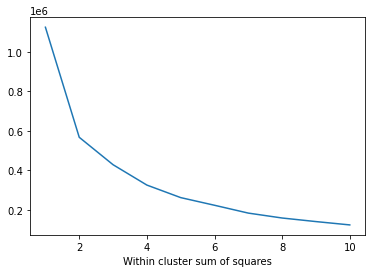

In [73]:
plt.plot(range(1,11),WithinCluster)
plt.xlabel("No of clusters")
plt.xlabel("Within cluster sum of squares")
plt.show()

In [102]:
Kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=Kmeans.fit_predict(X)

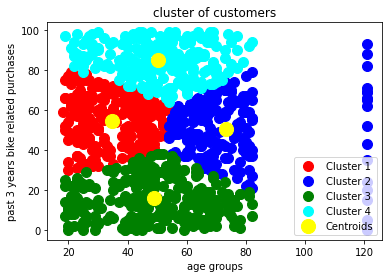

In [106]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')
plt.legend()
plt.title("cluster of customers")
plt.xlabel("age groups")
plt.ylabel("past 3 years bike related purchases")
plt.figsize=(15,15)
plt.show()